# STOP!!! READ THIS FIRST
You should only look at these solutions once you think you have working solutions of your own.
If you are working through Hogg 2010 then you are probably doing so **for your own benefit**. Thus, if you look at these early then you **aren't benefiting from the exercises at all**. Nobody is impressed at how correct your code is. The point is to learn by doing, not by copying.

# Section 1 - Standard Practice
This section is all about using basic linear algebra to do model fitting. So all we need is numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True, fontsize=24) #If this gives a warning just ignore it
plt.rc("errorbar", capsize=3) #Ignore

/home/tmcclintock/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#Problem 1
#Get the data. We only want x, y and the error on y
_, x_all, y_all, sigy_all, _, _ = np.genfromtxt("data.txt", unpack=True, delimiter='&', skip_header=1)
x    = x_all[4:]
y    = y_all[4:]
sigy = sigy_all[4:] #For now we skip the first 4 points
print x.shape, y.shape, sigy.shape

(16,) (16,) (16,)


In [3]:
#Create the covariance matrix
C = np.diag(sigy**2)
Cinv = np.linalg.inv(C)
#Create the "A" matrix
A = np.vstack((np.ones_like(x), x)).T
print A.shape, C.shape
#Do the linear algebra
#First get the covariance on the parameters and then plug it in
cov = np.linalg.inv(np.dot(A.T, np.dot(Cinv, A)))
b, m = np.dot(cov, np.dot(A.T, np.dot(Cinv, y)))
print b, m
print np.sqrt(np.diagonal(cov))
print "Boom"

(16, 2) (16, 16)
34.0477277575 2.23992083163
[ 18.24616675   0.10778048]
Boom


(0, 700)

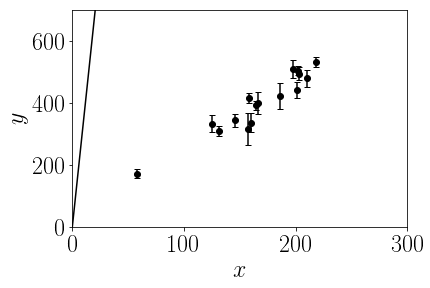

In [4]:
#Plot our results
domain = np.linspace(0, 300, 100)
model = b*domain + m
plt.errorbar(x, y, sigy, marker='o', ls='', c='k')
plt.plot(domain, model, ls='-', c='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(0, 300)
plt.ylim(0, 700)

In [5]:
#Problem 2
x    = x_all
y    = y_all
sigy = sigy_all
print x.shape, y.shape, sigy.shape

(20,) (20,) (20,)


In [6]:
#Create the covariance matrix
C = np.diag(sigy**2)
Cinv = np.linalg.inv(C)
#Create the "A" matrix
A = np.vstack((np.ones_like(x), x)).T
print A.shape, C.shape
#Do the linear algebra
#First get the covariance on the parameters and then plug it in
cov = np.linalg.inv(np.dot(A.T, np.dot(Cinv, A)))
b, m = np.dot(cov, np.dot(A.T, np.dot(Cinv, y)))
print b, m
print np.sqrt(np.diagonal(cov))
print "Boom 2"

(20, 2) (20, 20)
213.273491976 1.07674752417
[ 14.39403311   0.07740678]
Boom 2


(0, 700)

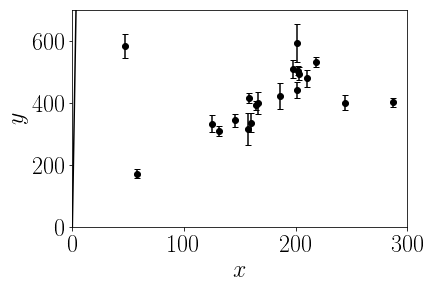

In [7]:
#Plot our results
domain = np.linspace(0, 300, 100)
model = b*domain + m
plt.errorbar(x, y, sigy, marker='o', ls='', c='k')
plt.plot(domain, model, ls='-', c='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.xlim(0, 300)
plt.ylim(0, 700)

In [8]:
#Problem 3
x    = x_all[4:]
y    = y_all[4:]
sigy = sigy_all[4:] #Skip the first 4 points
print x.shape, y.shape, sigy.shape

(16,) (16,) (16,)


In [9]:
#Create the covariance matrix
C = np.diag(sigy**2)
Cinv = np.linalg.inv(C)
#Create the "A" matrix
A = np.vstack((np.ones_like(x), x, x**2)).T
print A.shape, C.shape
#Do the linear algebra
#First get the covariance on the parameters and then plug it in
cov = np.linalg.inv(np.dot(A.T, np.dot(Cinv, A)))
b, m, q = np.dot(cov, np.dot(A.T, np.dot(Cinv, y)))
print b, m, q
print np.sqrt(np.diagonal(cov))
print "Boom 3"

(16, 3) (16, 16)
72.8946264717 1.59605045227 0.00229888840812
[  3.89115552e+01   5.79747913e-01   2.03385871e-03]
Boom 3
